# Exercice 3

In [219]:
#import Pkg
#Pkg.add("JuMP")
#Pkg.add("Gurobi")

using JuMP, Gurobi, DataFrames, CSV, Random, LinearAlgebra

In [220]:
#using Pkg
#Pkg.add("PyPlot")
using PyPlot

# Question a

* l0-regularization 

In [221]:
function powered_norm(y, X, beta)
    n, m = size(X)
    #return sum((y[i, 1] - dot(X[i,:], beta))^2 for i = 1:n)
    return sum((y[i, 1] - sum(X[i, j]*beta[j] for j in 1:m))^2 for i = 1:n)
end

function powered_norm(beta)
    n = size(X, 1)
    return sum(beta[i]^2 for i in 1:n)
end

powered_norm (generic function with 4 methods)

In [255]:
function regularized_regression_l0(y, X, rho)
    M = 100000
    n,p = size(y, 1)
    m = Model(solver = GurobiSolver())
    
    @variable(m, beta[1:n])
    @variable(m, z[1:n], Bin)
    
    @objective(m, 
        Min, 
        sum((y[i, 1] - sum(X[i, j]*beta[j] for j in 1:p))^2 for i in 1:n) 
        + rho*sum(z[i] for i in 1:n))
    
    for i in 1:n
        @constraint(m, beta[i] <= M * z[i])
        @constraint(m, (-beta[i]) <= M * z[i])
    end
    
    sol = solve(m)
    
    return getvalue(beta)
    
end

regularized_regression_l0 (generic function with 1 method)

* l1-regularization

In [223]:
function regularized_regression_l1(y, X, rho)
    n,p = size(y, 1)
    
    m = Model(solver = GurobiSolver())
    
    @variable(m, beta[1:n])
    @variable(m, z[1:n])
    
    @objective(m, Min, sum((y[i, 1] - sum(X[i, j]*beta[j] for j in 1:p))^2 for i = 1:n) +rho*sum(z[i] for i in 1:n))
    
    for i in 1:n
        @constraint(m, (z[i]) >= beta[i])
        @constraint(m, (z[i]) >= - beta[i])
    end
    
    sol = solve(m)
    
    return getvalue(beta)
    
end

regularized_regression_l1 (generic function with 1 method)

* l2-regularization

In [224]:
function regularized_regression_l2(y, X, rho)
    n,p = size(y, 1)
    
    m = Model(solver = GurobiSolver())
    
    @variable(m, beta[1:n])
    
    @objective(m, Min, sum((y[i, 1] - sum(X[i, j]*beta[j] for j in 1:p))^2 for i = 1:n) + rho*sum(beta[i]^2 for i in 1:p))

    sol = solve(m)
    
    return getvalue(beta)
end

regularized_regression_l2 (generic function with 1 method)

## Question b

In [225]:
sparseX2 = CSV.read("sparseX2.csv")
sparseY2 = CSV.read("sparseY2.csv")

,2.3428592788251605
,Float64
1,-3.04512
2,-5.90616
3,0.467956
4,-4.52402
5,1.77557
6,-1.1383
7,-3.26992
8,5.39506
9,4.66784


Creation of the validation, training and testing sets.

In [226]:
function generate_val_train_test_sets(data, output, val, test)
    n = size(data, 1)
    index = shuffle([i for i in 1:n])
    
    i_val = floor(Int,val*n)
    i_test = floor(Int,(val+test)*n)
    
    ind_val = index[1:i_val]
    ind_test = index[i_val+1:i_test]
    ind_train = index[i_test+1:n]
    
    val_set = data[ind_val, :]
    test_set = data[ind_test, :]
    train_set = data[ind_train, :]

    val_set_output = output[ind_val, :]
    test_set_output = output[ind_test, :]
    train_set_output = output[ind_train, :]
    
    return val_set, test_set, train_set, val_set_output, test_set_output, train_set_output 
    
end

generate_val_train_test_sets (generic function with 1 method)

In [227]:
val_set, test_set, train_set, val_set_output, test_set_output, train_set_output = generate_val_train_test_sets(sparseX2, sparseY2, 0.25, 0.25)

(49×100 DataFrame. Omitted printing of 97 columns
│ Row │ 0.5299655761667461 │ -0.9716762048860438 │ -0.15393921542968417 │
│     │ Float64            │ Float64             │ Float64              │
├─────┼────────────────────┼─────────────────────┼──────────────────────┤
│ 1   │ -0.39862           │ -1.42984            │ 0.695282             │
│ 2   │ -0.693654          │ 0.292859            │ -0.116407            │
│ 3   │ 1.18512            │ 0.663567            │ -0.352346            │
│ 4   │ 0.583708           │ 0.871909            │ 0.0872166            │
│ 5   │ 0.475183           │ -0.76297            │ 1.79925              │
│ 6   │ 1.24971            │ 0.864455            │ -0.504286            │
│ 7   │ -0.0302669         │ -0.156948           │ -0.531705            │
│ 8   │ 1.29992            │ 0.193736            │ 0.55788              │
│ 9   │ 0.658323           │ -0.577509           │ 0.0667779            │
│ 10  │ -0.413087          │ -0.0256681          │ -1.39425   

We choose ρ as the value that gives the best mean squared prediction error on the validation set.

Mean Square Error

In [228]:
function mean_square_error(y_real, y_output)
    n = size(y_real, 1)
    return (sum((y_real[i, 1] - y_output[i, 1])^2 for i in 1:n))^(1/2)
end

mean_square_error (generic function with 1 method)

In [229]:
function regression_output(data, beta)
    nbr_rows = size(data, 1)
    nbr_columns = size(data, 2)
    
    y = zeros((nbr_rows, 1))
    
    for i in 1:nbr_rows
        y[i, 1] = sum(data[i, j]*beta[i] for j in 1:nbr_columns)
    end
    return y
end


regression_output (generic function with 1 method)

In [256]:
function compute_error_l0(rho, set, output_set)
    beta = regularized_regression_l0(train_set_output, train_set, rho)
    y_output = regression_output(set, beta)
    error = mean_square_error(output_set, y_output)
    return error
end

compute_error_l0 (generic function with 1 method)

In [231]:
function compute_error_l1(rho, set, output_set)
    beta = regularized_regression_l1(train_set_output, train_set, rho)
    y_output = regression_output(set, beta)
    error = mean_square_error(output_set, y_output)
    return error
end

compute_error_l1 (generic function with 1 method)

In [232]:
function compute_error_l2(rho, set, output_set)
    beta = regularized_regression_l2(train_set_output, train_set, rho)
    y_output = regression_output(set, beta)
    error = mean_square_error(output_set, y_output)
    return error
end

compute_error_l2 (generic function with 1 method)

In [249]:
#rho_test = vcat([0.0001, 0.001, 0.01, 0.1, 1], [i*10 for i in 1:30])
rho_test = [0.1, 1, 10, 100]

4-element Array{Float64,1}:
   0.1
   1.0
  10.0
 100.0

In [254]:
beta = regularized_regression_l0(train_set_output, train_set, 1)

BoundsError: BoundsError: attempt to access 100
  at index [2]

In [257]:
error_l0 = zeros(length(rho_test))

for i in 1:length(rho_test)
    error_l0[i] = compute_error_l0(rho_test[i], val_set, val_set_output)
end

BoundsError: BoundsError: attempt to access 100
  at index [2]

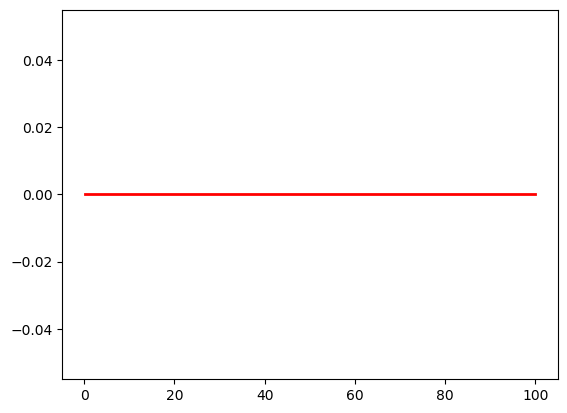

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x142c3e2b0>

In [246]:
plot(rho_test, error_l0, color="red", linewidth=2.0)      

In [236]:
error_l1 = zeros(length(rho_test))

for i in 1:length(rho_test)
    error_l1[i] = compute_error_l1(rho_test[i], val_set, val_set_output)
end

BoundsError: BoundsError: attempt to access 100
  at index [2]

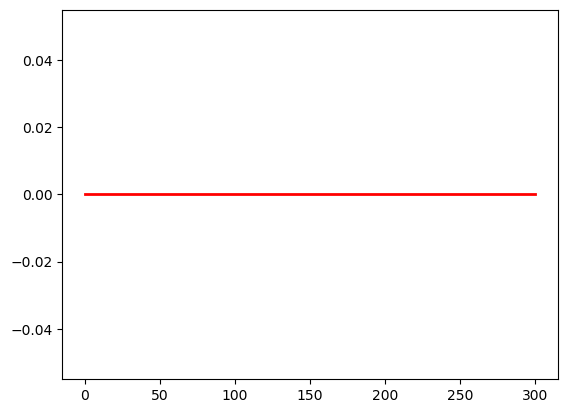

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x141f340f0>

In [237]:
plot(rho_test, error_l1, color="red", linewidth=2.0)    

In [238]:
error_l2 = zeros(length(rho_test))

for i in 1:length(rho_test)
    error_l2[i] = compute_error_l2(rho_test[i], val_set, val_set_output)
end

BoundsError: BoundsError: attempt to access 100
  at index [2]

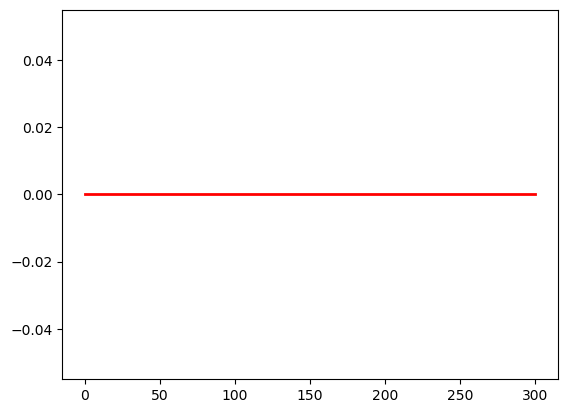

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x142aad470>

In [239]:
plot(rho_test, error_l2, color="red", linewidth=2.0)    

Compute ∥y − Xβ∥2 on the testing set using the β’s from l0-regularized, l1-regularized linear regression, l2- regularized linear regression, and standard linear regression (ρ = 0)

In [240]:
l0_error = compute_error_l0(rho_l0, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l0 not defined

In [241]:
l1_error = compute_error_l1(rho_l1, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l1 not defined

In [242]:
l2_error = compute_error_l2(rho_l2, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l2 not defined